In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:
titanic['age'] = titanic['age'].ffill().bfill()

In [9]:
titanic['deck'] = titanic['deck'].cat.add_categories('unknown')

titanic['deck'] = titanic['deck'].fillna('unknown')

top_decks = titanic['deck'].value_counts().nlargest(5).index
titanic['deck'] = titanic['deck'].apply(lambda x: x if x in top_decks else 'unknown')


In [10]:
titanic.drop_duplicates(inplace=True)


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic['fare'] = scaler.fit_transform(titanic[['fare']])


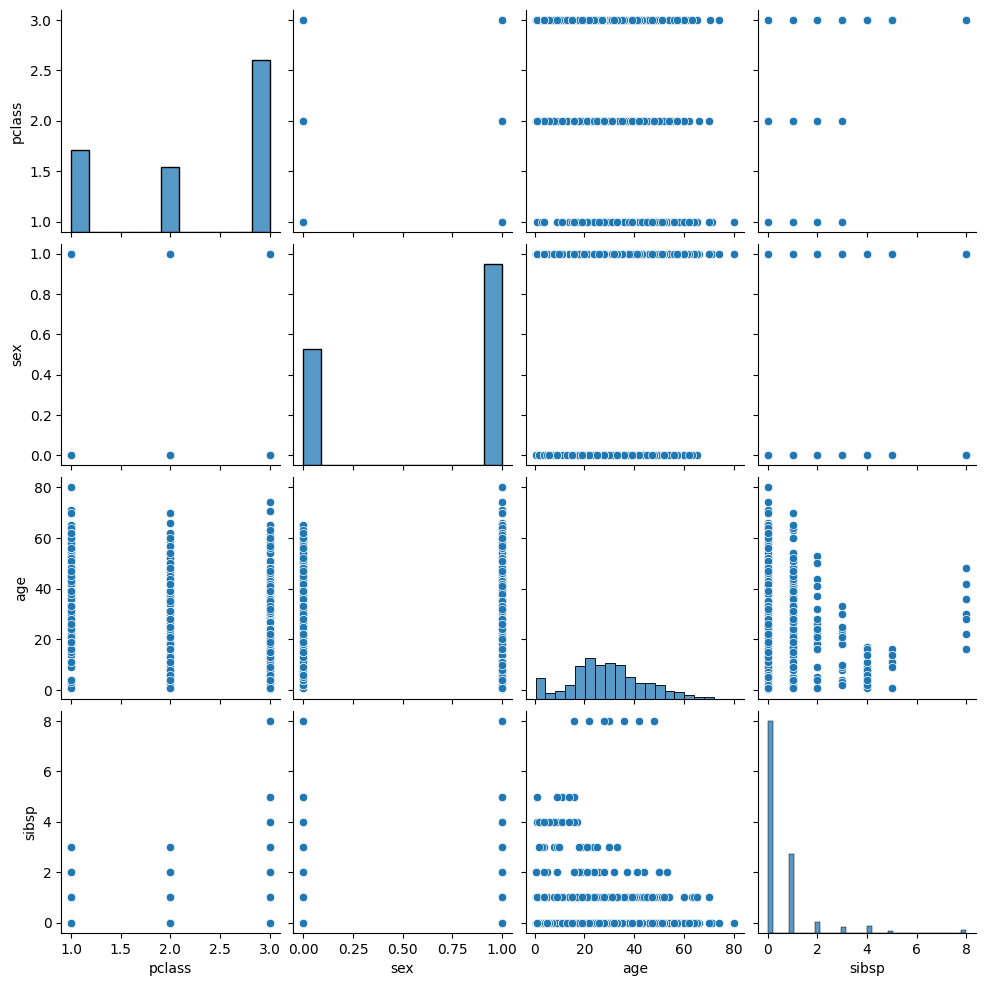

In [13]:
import matplotlib.pyplot as plt

sns.pairplot(titanic[['pclass', 'sex', 'age', 'sibsp']])
plt.show()


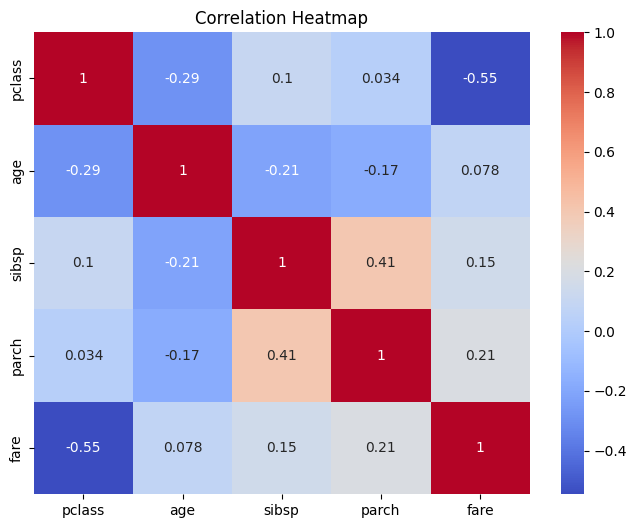

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(titanic[['pclass', 'age', 'sibsp', 'parch', 'fare']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
